# The miniJPAS survey: star-galaxy classification using machine learning


Codes for graphics used in the paper “The miniJPAS survey: star-galaxy classification using machine learning” (P. O. Baqui, V. Marra et al.) https://arxiv.org/abs/2007.07622

In this code we analysed the data from SDSS survey

In [1]:
# import library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# reading data
df = pd.read_csv('/home/pedro/Desktop/after_referee/sdss/sdss.csv')
df = df[df.rSDSS.between(15.0,20.0, inclusive=True)][df["FLAGS"]==0][df["MASK_FLAGS"]==0]

print('galaxies: %d' % (df['class_SDSS'] == 3).sum())
print('star: %d' % (df['class_SDSS'] == 6).sum())

print(df.shape)

galaxies: 691
star: 1119
(1810, 132)


In [2]:
bins = 'auto'
log = False
normed = False
alpha = 0.6

df['fwhm'] = df['fwhm']*3600


d=df['rSDSS']

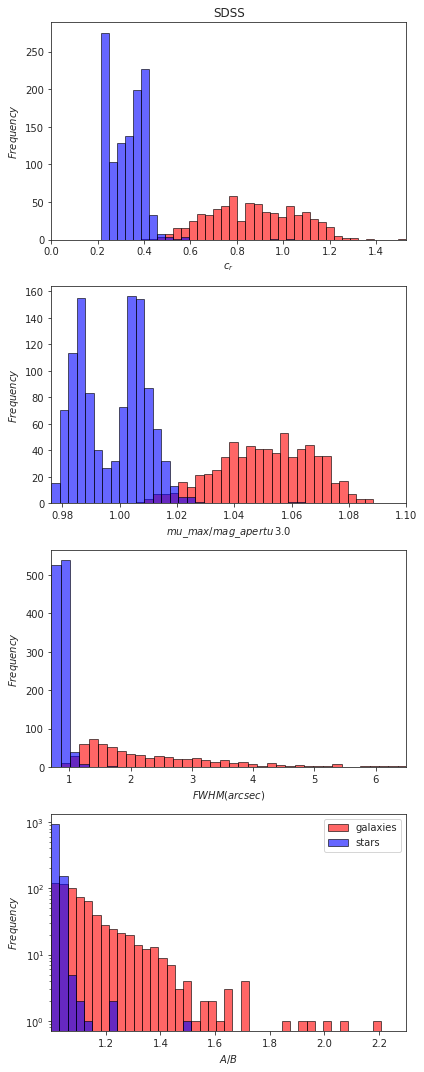

In [3]:
# Histogram Probability 

#bins = np.linspace(0, 1, 21)
log = False
normed = False
alpha = 0.6

#ylim_upper = 2*10**4

#sns.color_palette("RdBu", n_colors=30)
sns.set_style("ticks")

fig = plt.figure(figsize=(6, 15))
plt.subplots_adjust(hspace=0.2)


ax0 = plt.subplot(411)
ax0.set_title('SDSS')


bins0=np.histogram(np.hstack((df['c_r'][df['class_SDSS'] == 3],df['c_r'][df['class_SDSS'] == 6])), bins=38)[1] #get the bin edges


ax0.hist(df['c_r'][df['class_SDSS'] == 3], bins=bins0, log=log, label='galaxies', alpha=alpha, color='red', edgecolor = 'black')
ax0.hist(df['c_r'][df['class_SDSS'] == 6], bins=bins0, log=log, label='stars', alpha=alpha, color='blue', edgecolor = 'black')

ax0.set_xlim(0, max(df['c_r']))
#ax0.set_ylim(1, ylim_upper)
ax0.set_ylabel(r'$Frequency$')
ax0.set_xlabel(r'$c_r$')
#ax0 = plt.gca()
#ax0.set_aspect(aspect=0.5)
#ax0.get_yaxis().set_tick_params(which='both', direction='out')
#ax0.text(.5,.8,'$c_r$',horizontalalignment='center', fontsize=12, transform=ax0.transAxes)
#ax0.set_yticks([10**1, 10**2, 10**3])


ax1 = plt.subplot(412)
bins1=np.histogram(np.hstack((df['mu_max_mag_apertu'][df['class_SDSS'] == 3],df['mu_max_mag_apertu'][df['class_SDSS'] == 6])), bins=38)[1] #get the bin edges

ax1.hist(df['mu_max_mag_apertu'][df['class_SDSS'] == 3], bins=bins1, log=log, label='galaxies', alpha=alpha, color='red', edgecolor = 'black')
ax1.hist(df['mu_max_mag_apertu'][df['class_SDSS'] == 6], bins=bins1, log=log, label='stars', alpha=alpha, color='blue', edgecolor = 'black')

#ax1.legend(loc='upper right')
ax1.set_xlim(min(df['mu_max_mag_apertu']),1.1)
#ax1.set_ylim(1, ylim_upper)
ax1.set_ylabel(r'$Frequency$')
ax1.set_xlabel(r'$mu\_max/mag\_apertu \, 3.0}$')
#ax1.get_yaxis().set_tick_params(which='both', direction='out')
#ax1.text(.5,.8,'ENSEMBLE',horizontalalignment='center', fontsize=12, transform=ax1.transAxes)
#ax1.set_yticks([10**1, 10**2, 10**3])


ax2 = plt.subplot(413)
bins2=np.histogram(np.hstack((df['fwhm'][df['class_SDSS'] == 3],df['fwhm'][df['class_SDSS'] == 6])), bins=80)[1] #get the bin edges


ax2.hist(df['fwhm'][df['class_SDSS'] == 3], bins=bins2, log=log, label='galaxies', alpha=alpha, color='red', edgecolor = 'black')
ax2.hist(df['fwhm'][df['class_SDSS'] == 6], bins=bins2, log=log, label='stars', alpha=alpha, color='blue', edgecolor = 'black')
#ax2.legend(loc='upper right')
ax2.set_xlim(min(df['fwhm']),6.5)
#ax2.set_ylim(1, ylim_upper)
ax2.set_ylabel(r'$Frequency$')
ax2.set_xlabel(r'$FWHM (arcsec)$')
#ax2.get_yaxis().set_tick_params(which='both', direction='out')
#ax2.text(.5,.8,'ERT', horizontalalignment='center', fontsize=12,transform=ax2.transAxes)
#ax2.set_yticks([10**1, 10**2, 10**3])

ax3 = plt.subplot(414)
bins3=np.histogram(np.hstack((df['alb'][df['class_SDSS'] == 3],df['alb'][df['class_SDSS'] == 6])), bins=40)[1] #get the bin edges

ax3.hist(df['alb'][df['class_SDSS'] == 3], bins=bins3, log=True, label='galaxies', alpha=alpha, color='red', edgecolor = 'black')
ax3.hist(df['alb'][df['class_SDSS'] == 6], bins=bins3, log=True, label='stars', alpha=alpha, color='blue', edgecolor = 'black')
ax3.legend(loc='upper right')
ax3.set_xlim(min(df['alb']), 2.3)
#ax3.set_xlim(0, 1)
#ax3.set_ylim(1, ylim_upper)
ax3.set_ylabel(r'$Frequency$')
ax3.set_xlabel(r'$A/B$')
#ax3.set_xlabel(r'$P\,\left(S\right)$', fontsize=12)
#ax3.get_yaxis().set_tick_params(which='both', direction='out')
#ax3.text(.5,.8,'PDF', horizontalalignment='center',transform=ax3.transAxes, fontsize=12)
#ax3.set_yticks([10**1, 10**2, 10**3])
#ax3.text(2, 110, 'SDSS')


#xticklabels =  ax0.get_xticklabels() + ax1.get_xticklabels() + ax2.get_xticklabels() + ax3.get_xticklabels()
#plt.setp(xticklabels, visible=False)
#plt.title('Histogram Probability morpho SDSS')
#plt.savefig('distribution_morphological_SDSS.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()